# 311_NYC Customer Service Requests Analysis

### Import Required Libraries

In [172]:
#import the required Libraries
import pandas as pd
import numpy as np
from pandas import Series
from datetime import datetime as dt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from matplotlib import pyplot as plt
%matplotlib inline

### Import the dataset & Visualize the dataset

In [113]:
df_311_CSRA = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
df_311_CSRA.head(30)

C:\Users\vinay\AppData\Local\Temp\ipykernel_11684\2082691210.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df_311_CSRA = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,12/31/2015 11:56:30 PM,01/01/2016 01:50:11 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,12/31/2015 11:55:32 PM,01/01/2016 01:53:54 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
7,32307009,12/31/2015 11:54:05 PM,01/01/2016 01:42:54 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)"
8,32308581,12/31/2015 11:53:58 PM,01/01/2016 08:27:32 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)"
9,32308391,12/31/2015 11:53:58 PM,01/01/2016 01:17:40 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"


In [114]:
df_311_CSRA.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"
364557,29611816,01/01/2015 12:00:50 AM,01/01/2015 02:47:50 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,123-19 135 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674212,-73.803585,"(40.674211762243935, -73.80358548685278)"


### Print the columns of the DataFrame

In [115]:
df_311_CSRA.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

### shape of the dataset

In [116]:
df_311_CSRA.shape

(364558, 53)

### variables with null values

In [117]:
df_nulldata=df_311_CSRA.isnull().sum()
df_nulldata

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

## Data Exploratory Analysis:

### frequency plot to show the number of null values in each column of the DataFrame

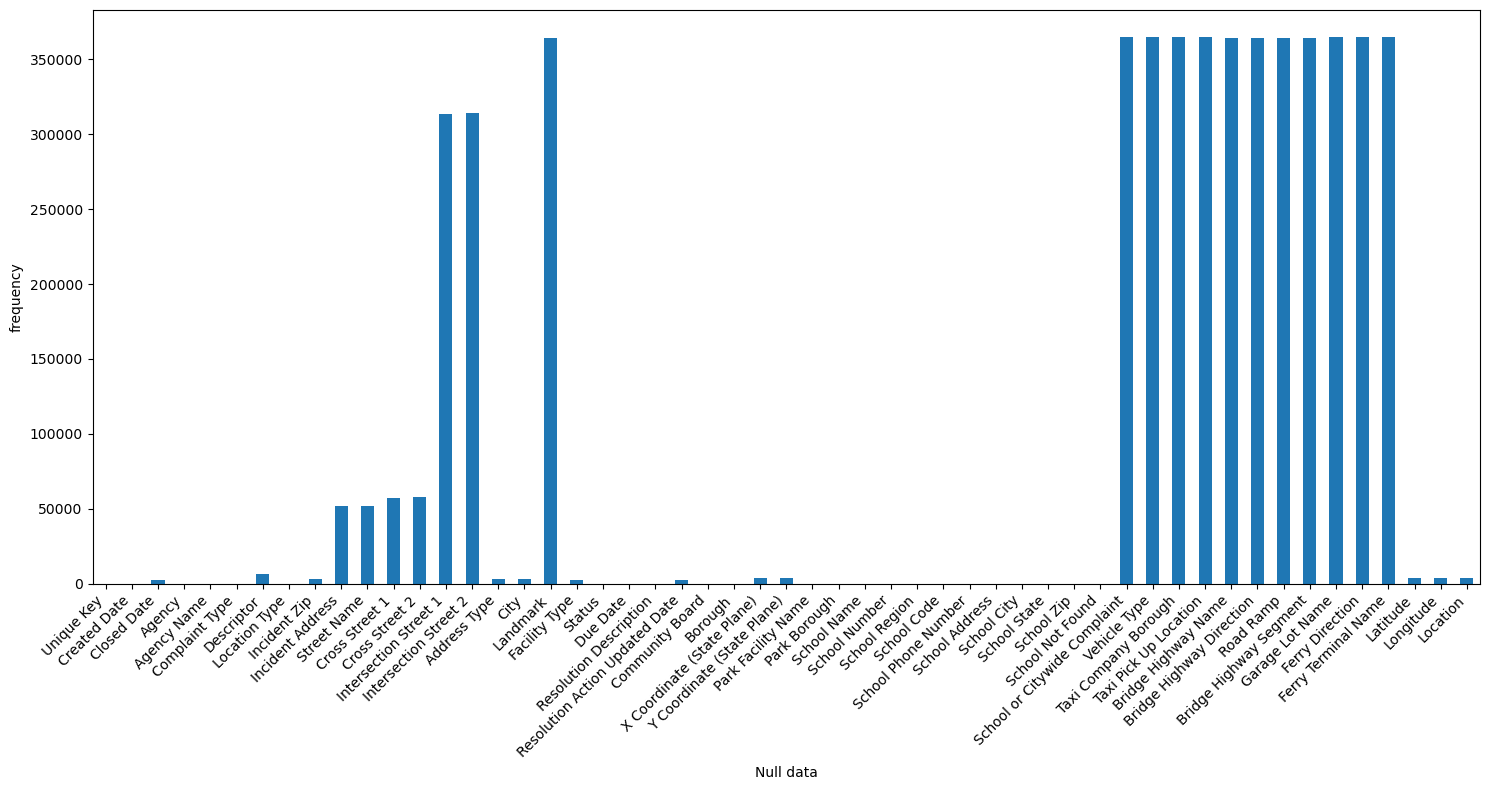

In [118]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
df_nulldata.plot(ax=ax, kind='bar', xlabel='Null data', ylabel='frequency')
plt.xticks(rotation=45,ha='right')
plt.show()

### Missing value treatment

In [119]:
df_311_CSRA['Closed Date'].isnull().sum()

2381

In [120]:
df_311_CSRA=df_311_CSRA.dropna(subset=['Closed Date'])

In [121]:
df_311_CSRA.shape

(362177, 53)

In [122]:
df_311_CSRA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      362177 non-null  int64  
 1   Created Date                    362177 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          362177 non-null  object 
 4   Agency Name                     362177 non-null  object 
 5   Complaint Type                  362177 non-null  object 
 6   Descriptor                      355681 non-null  object 
 7   Location Type                   362047 non-null  object 
 8   Incident Zip                    361502 non-null  float64
 9   Incident Address                310491 non-null  object 
 10  Street Name                     310491 non-null  object 
 11  Cross Street 1                  306846 non-null  object 
 12  Cross Street 2  

In [123]:
df_311_CSRA['Closed Date']=pd.to_datetime(df_311_CSRA['Closed Date'])
df_311_CSRA['Created Date']=pd.to_datetime(df_311_CSRA['Created Date'])

In [124]:
df_311_CSRA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      362177 non-null  int64         
 1   Created Date                    362177 non-null  datetime64[ns]
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          362177 non-null  object        
 4   Agency Name                     362177 non-null  object        
 5   Complaint Type                  362177 non-null  object        
 6   Descriptor                      355681 non-null  object        
 7   Location Type                   362047 non-null  object        
 8   Incident Zip                    361502 non-null  float64       
 9   Incident Address                310491 non-null  object        
 10  Street Name                     310491 non-null  object 

In [125]:
df_311_CSRA.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [126]:
df_311_CSRA['Closed_Date']=df_311_CSRA['Closed Date'].dt.date
df_311_CSRA['Closed_Time']=df_311_CSRA['Closed Date'].dt.time
df_311_CSRA['Created_Date']=df_311_CSRA['Created Date'].dt.date
df_311_CSRA['Created_Time']=df_311_CSRA['Created Date'].dt.time

In [127]:
df_311_CSRA.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Closed_Date,Closed_Time,Created_Date,Created_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",2016-01-01,00:55:15,2015-12-31,23:59:45
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",2016-01-01,01:26:57,2015-12-31,23:59:44
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",2016-01-01,04:51:03,2015-12-31,23:59:29
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",2016-01-01,07:43:13,2015-12-31,23:57:46
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",2016-01-01,03:24:42,2015-12-31,23:56:58


In [128]:
df_311_CSRA.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Closed_Date,Closed_Time,Created_Date,Created_Time
364553,29609918,2015-01-01 00:04:44,2015-01-01 10:22:31,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)",2015-01-01,10:22:31,2015-01-01,00:04:44
364554,29608392,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",2015-01-01,02:25:02,2015-01-01,00:04:28
364555,29607589,2015-01-01 00:01:30,2015-01-01 00:20:33,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)",2015-01-01,00:20:33,2015-01-01,00:01:30
364556,29610889,2015-01-01 00:01:29,2015-01-01 02:42:22,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)",2015-01-01,02:42:22,2015-01-01,00:01:29
364557,29611816,2015-01-01 00:00:50,2015-01-01 02:47:50,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,123-19 135 STREET,...,NaN,NaN,NaN,40.674212,-73.803585,"(40.674211762243935, -73.80358548685278)",2015-01-01,02:47:50,2015-01-01,00:00:50


In [129]:

df_311_CSRA=df_311_CSRA[df_311_CSRA['Created_Date']<=df_311_CSRA['Closed_Date']]

In [130]:
df_311_CSRA.shape

(362177, 57)

### Time elapsed in closed and creation date

In [131]:
df_311_CSRA['time_elapsed'] =df_311_CSRA['Closed Date'] -df_311_CSRA['Created Date']


### Convert the calculated date to seconds to get a better representation

In [132]:
from datetime import datetime
import time
df_311_CSRA['time_elapsed_seconds']=(df_311_CSRA['time_elapsed']).dt.total_seconds()

In [133]:
df_311_CSRA.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Ferry Terminal Name,Latitude,Longitude,Location,Closed_Date,Closed_Time,Created_Date,Created_Time,time_elapsed,time_elapsed_seconds
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",2016-01-01,00:55:15,2015-12-31,23:59:45,0 days 00:55:30,3330.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",2016-01-01,01:26:57,2015-12-31,23:59:44,0 days 01:27:13,5233.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",2016-01-01,04:51:03,2015-12-31,23:59:29,0 days 04:51:34,17494.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",2016-01-01,07:43:13,2015-12-31,23:57:46,0 days 07:45:27,27927.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",2016-01-01,03:24:42,2015-12-31,23:56:58,0 days 03:27:44,12464.0


### View the descriptive statistics for the newly created column

In [134]:
(df_311_CSRA['time_elapsed_seconds']).describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: time_elapsed_seconds, dtype: float64

In [135]:
df_311_CSRA.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

### Check the number of null values in the Complaint_Type and City columns

In [136]:
#Check the number of null values in the Complaint_Type and City columns
#null values in the Complaint_Type columns
df_311_CSRA['Complaint Type'].isnull().sum()

0

In [137]:
#null values in the City columns
df_311_CSRA['City'].isnull().sum()

674

###  Impute the NA value with Unknown City

In [138]:
#Impute the NA value with Unknown City
df_311_CSRA['City']=df_311_CSRA['City'].fillna('Unknown_city')

In [139]:
df_311_CSRA['City'].isnull().sum()

0

In [140]:
complaintstype=df_311_CSRA['Complaint Type'].unique()
complaintstype

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Agency Issues', 'Squeegee', 'Animal in a Park'], dtype=object)

In [141]:
cities=df_311_CSRA['City']
Max_compliants_city=df_311_CSRA['City'].value_counts()
 
percentage_compliants_city=Max_compliants_city/Max_compliants_city.sum()*100
freq_of_City_Complaints=pd.DataFrame({'Max_compliants_city':Max_compliants_city,'percentage_compliants_city':percentage_compliants_city})
freq_of_City_Complaints
#complaints=df_311_CSRA['Complaint Type']
#sns.countplot

,Max_compliants_city,percentage_compliants_city
BROOKLYN,118849,32.815170
NEW YORK,77289,21.340118
BRONX,49166,13.575130
STATEN ISLAND,15335,4.234118
JAMAICA,8930,2.465645
ASTORIA,7991,2.206380
FLUSHING,7486,2.066945
RIDGEWOOD,6391,1.764607
CORONA,5383,1.486290
WOODSIDE,4357,1.203003


###  Frequency plot for the complaints in each city

<Axes: title={'center': 'complaints in each city'}>

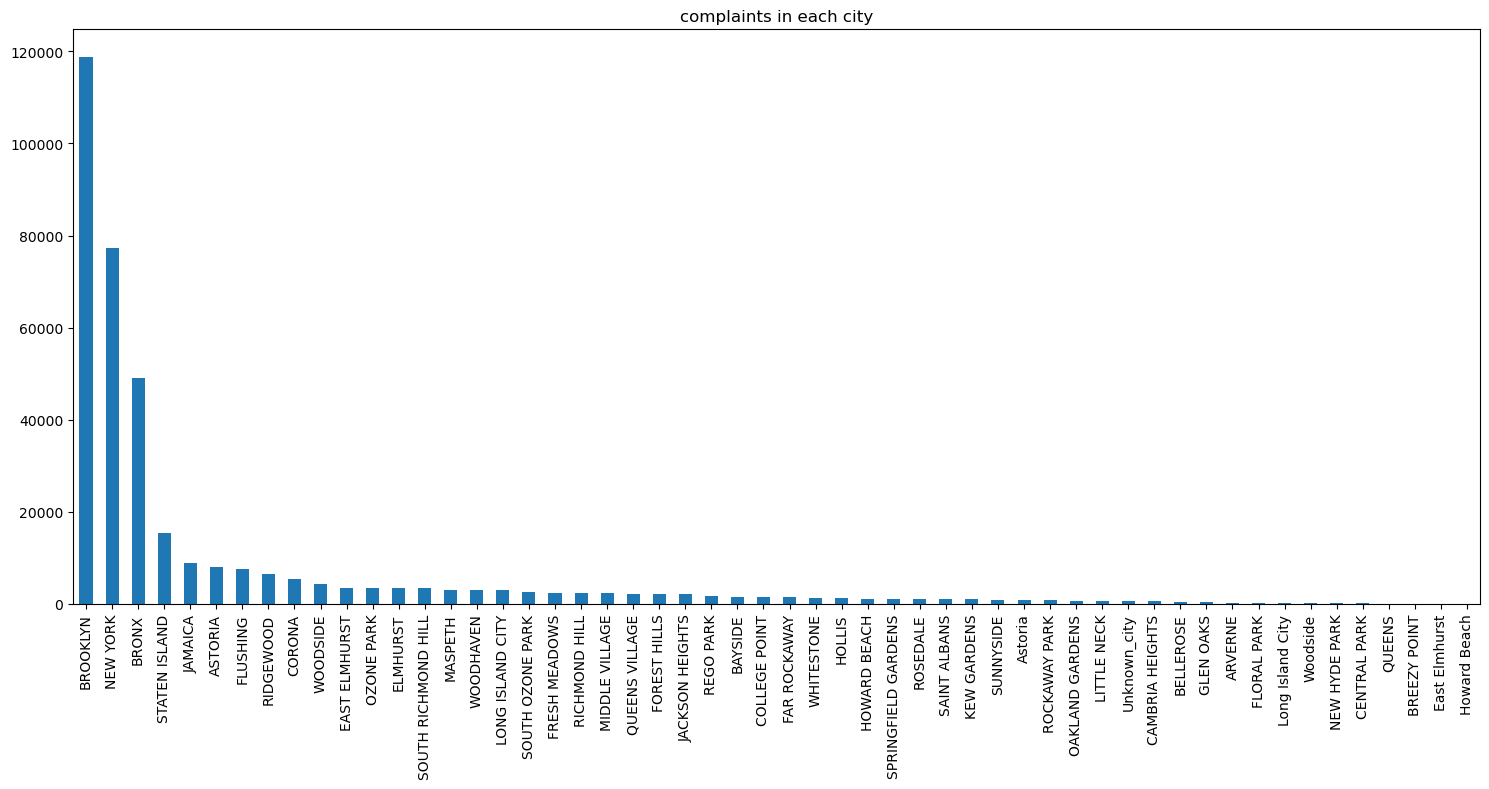

In [142]:
#Draw a frequency plot for the complaints in each city
Max_compliants_city.plot(kind='bar',figsize=[15,8],title='complaints in each city')

In [143]:
df_311_CSRA['Borough'].head(5)

0    MANHATTAN
1       QUEENS
2        BRONX
3        BRONX
4       QUEENS
Name: Borough, dtype: object

In [144]:
brooklyn_data = df_311_CSRA[df_311_CSRA['City']=='BROOKLYN']
brooklyn_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Ferry Terminal Name,Latitude,Longitude,Location,Closed_Date,Closed_Time,Created_Date,Created_Time,time_elapsed,time_elapsed_seconds
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",2016-01-01,01:50:11,2015-12-31,23:56:30,0 days 01:53:41,6821.0
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",2016-01-01,01:17:40,2015-12-31,23:53:58,0 days 01:23:42,5022.0
13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:47,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,...,NaN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)",2016-01-01,08:18:47,2015-12-31,23:47:58,0 days 08:30:49,30649.0
17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:10,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,...,NaN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)",2016-01-01,00:36:10,2015-12-31,23:44:52,0 days 00:51:18,3078.0
18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:28,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,...,NaN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)",2016-01-01,02:37:28,2015-12-31,23:40:59,0 days 02:56:29,10589.0


### Scatter and Hexbin plot of the concentration of complaints across Brooklyn

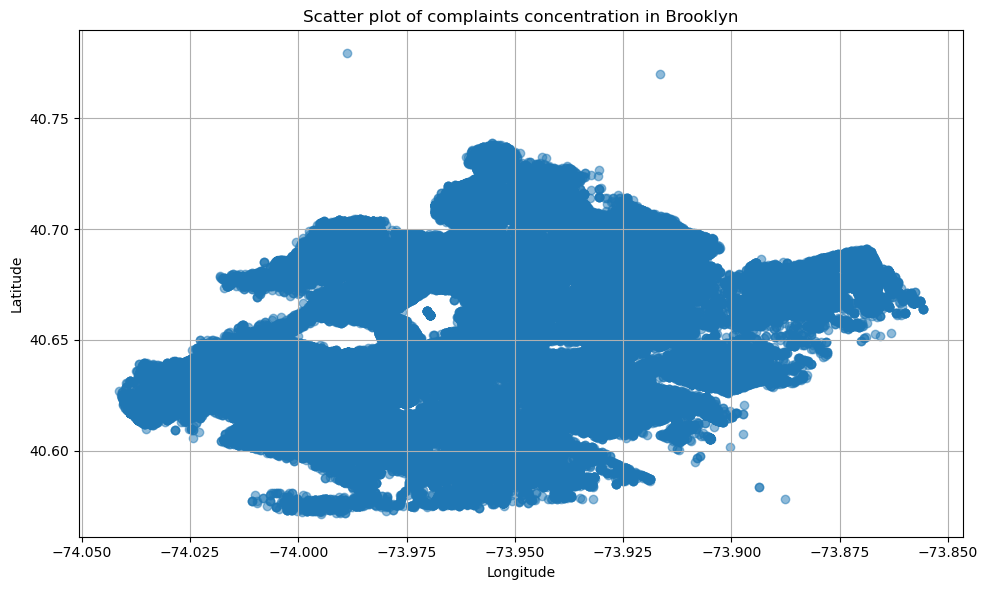

In [145]:
#scatter plot
plt.figure(figsize=(10,6))
plt.scatter(brooklyn_data['Longitude'],brooklyn_data['Latitude'], alpha=0.5)
plt.title('Scatter plot of complaints concentration in Brooklyn')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

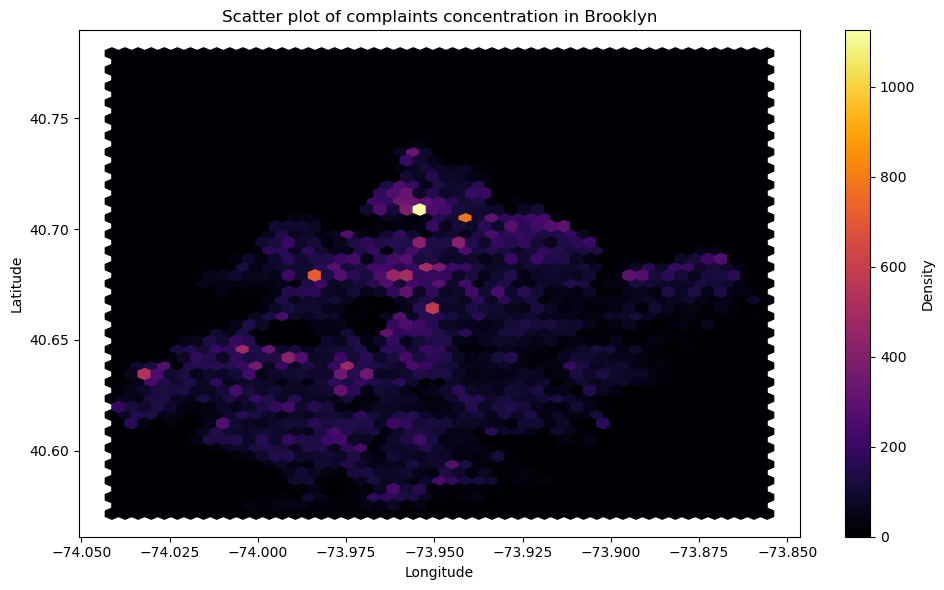

In [146]:
#hexbin plot
plt.figure(figsize=(10,6))
plt.hexbin(brooklyn_data['Longitude'],brooklyn_data['Latitude'], gridsize=50,cmap='inferno')
plt.title('Scatter plot of complaints concentration in Brooklyn')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Density')
plt.show()

## 3. Find major types of complaints:


### 3.1 Plot a bar graph to show the types of complaints

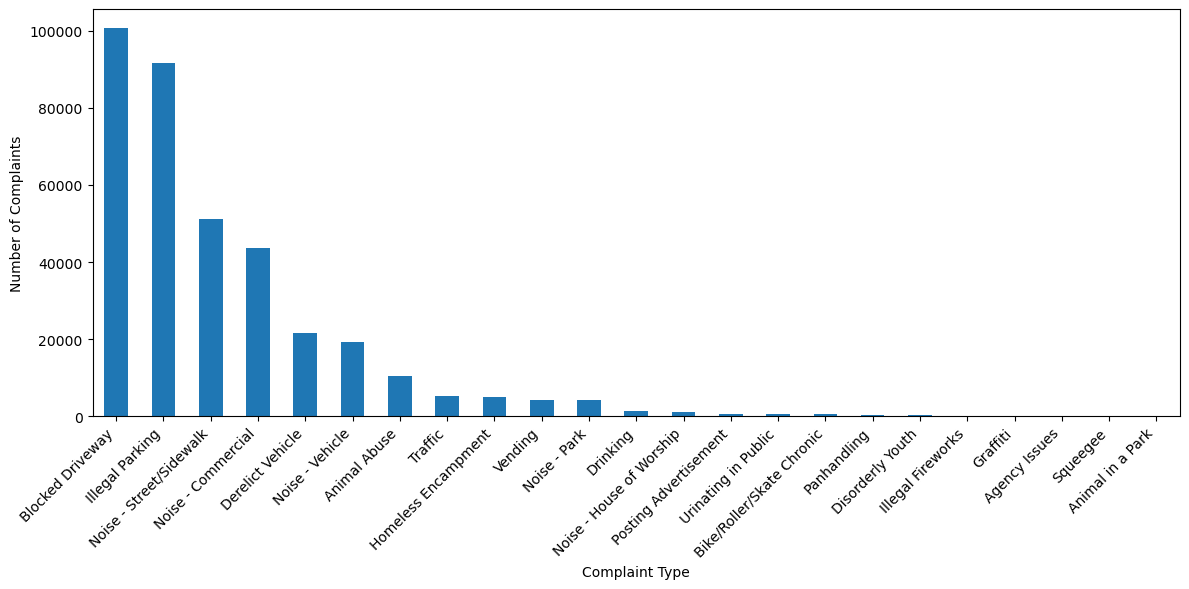

In [147]:
plt.figure(figsize=(12,6))
complaint_frequency_NYC = df_311_CSRA['Complaint Type'].value_counts()
complaint_frequency_NYC.plot(kind='bar')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [148]:
complaintstype=df_311_CSRA['Complaint Type'].unique()
complaintstype

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Agency Issues', 'Squeegee', 'Animal in a Park'], dtype=object)

### 3.2 Check the frequency of various types of complaints for NewYork City

In [149]:
#3.2 Check the frequency of various types of complaints for NewYork City
complaint_frequency_NYC = df_311_CSRA['Complaint Type'].value_counts()
print('Frequency of various Type of complaints in New York:')
print(complaint_frequency_NYC)

Frequency of various Type of complaints in New York:
Blocked Driveway             100624
Illegal Parking               91716
Noise - Street/Sidewalk       51139
Noise - Commercial            43751
Derelict Vehicle              21518
Noise - Vehicle               19301
Animal Abuse                  10530
Traffic                        5196
Homeless Encampment            4879
Vending                        4185
Noise - Park                   4089
Drinking                       1404
Noise - House of Worship       1068
Posting Advertisement           679
Urinating in Public             641
Bike/Roller/Skate Chronic       475
Panhandling                     325
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Animal in a Park                  1
Name: Complaint Type, dtype: int64


In [150]:
Citytype=df_311_CSRA['City'].unique()
Citytype

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'Unknown_city',
       'RIDGEWOOD', 'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND',
       'OZONE PARK', 'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [151]:
NewYork_Complaints = df_311_CSRA[df_311_CSRA['City']=='NEW YORK']
NewYork_Complaints.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Ferry Terminal Name,Latitude,Longitude,Location,Closed_Date,Closed_Time,Created_Date,Created_Time,time_elapsed,time_elapsed_seconds
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",2016-01-01,00:55:15,2015-12-31,23:59:45,0 days 00:55:30,3330.0
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:54,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)",2016-01-01,01:53:54,2015-12-31,23:55:32,0 days 01:58:22,7102.0


In [152]:
Complaint_frequency_NewYork = NewYork_Complaints['Complaint Type'].value_counts()
print('Frequency of various Type of complaints in New York :')
print(Complaint_frequency_NewYork)

Frequency of various Type of complaints in New York :
Noise - Street/Sidewalk      22245
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint Type, dtype: int64


### 3.3 Find the top 10 complaint types in NewYork City


In [153]:
#3.3 Find the top 10 complaint types NewYork
Complaint_frequency_NewYork.head(10)

Noise - Street/Sidewalk    22245
Noise - Commercial         18686
Illegal Parking            14549
Noise - Vehicle             6294
Homeless Encampment         3060
Blocked Driveway            2705
Vending                     2638
Animal Abuse                1941
Traffic                     1769
Noise - Park                1243
Name: Complaint Type, dtype: int64

### 3.4 Display the various types of complaints in each city

In [154]:
compliant_by_city = df_311_CSRA.groupby('City')['Complaint Type'].value_counts()
compliant_by_city.head(50)

City     Complaint Type           
ARVERNE  Illegal Parking                62
         Blocked Driveway               50
         Animal Abuse                   46
         Derelict Vehicle               32
         Noise - Street/Sidewalk        29
         Noise - House of Worship       14
         Noise - Vehicle                10
         Homeless Encampment             4
         Disorderly Youth                2
         Noise - Commercial              2
         Noise - Park                    2
         Drinking                        1
         Graffiti                        1
         Panhandling                     1
         Traffic                         1
         Urinating in Public             1
         Vending                         1
ASTORIA  Blocked Driveway             3436
         Noise - Commercial           1653
         Illegal Parking              1340
         Derelict Vehicle              426
         Noise - Street/Sidewalk       409
         Noise - Ve

### 3.5 Create a DataFrame, df_new, which contains cities as columns and complaint types in rows

In [155]:
df_new = df_311_CSRA.pivot_table(index='Complaint Type',columns='City', aggfunc='size',fill_value=0)
df_new

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown_city,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,0
Animal Abuse,46,170,0,53,15,2,1971,3191,15,0,...,74,40,42,786,40,1,43,57,111,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,16,0,0,1,0,22,124,0,0,...,1,1,0,10,2,2,4,2,5,0
Blocked Driveway,50,3436,159,514,138,3,17062,36445,177,0,...,1202,1946,330,2845,278,86,279,1363,2038,27
Derelict Vehicle,32,426,14,231,120,3,2402,6257,148,0,...,425,356,267,2184,17,63,279,369,298,8
Disorderly Youth,2,5,0,2,2,0,66,79,0,0,...,2,2,0,25,2,0,1,0,1,0
Drinking,1,43,0,1,1,1,206,291,0,0,...,14,25,6,188,12,3,3,4,15,0
Graffiti,1,4,0,3,0,0,15,60,0,0,...,2,0,0,6,1,0,1,0,4,0


## 4. Visualize the major types of complaints in each city

### 4.1 Draw another chart that shows the types of complaints in each city in a single chart, where different colors show the different types of complaints

<Figure size 1200x800 with 0 Axes>

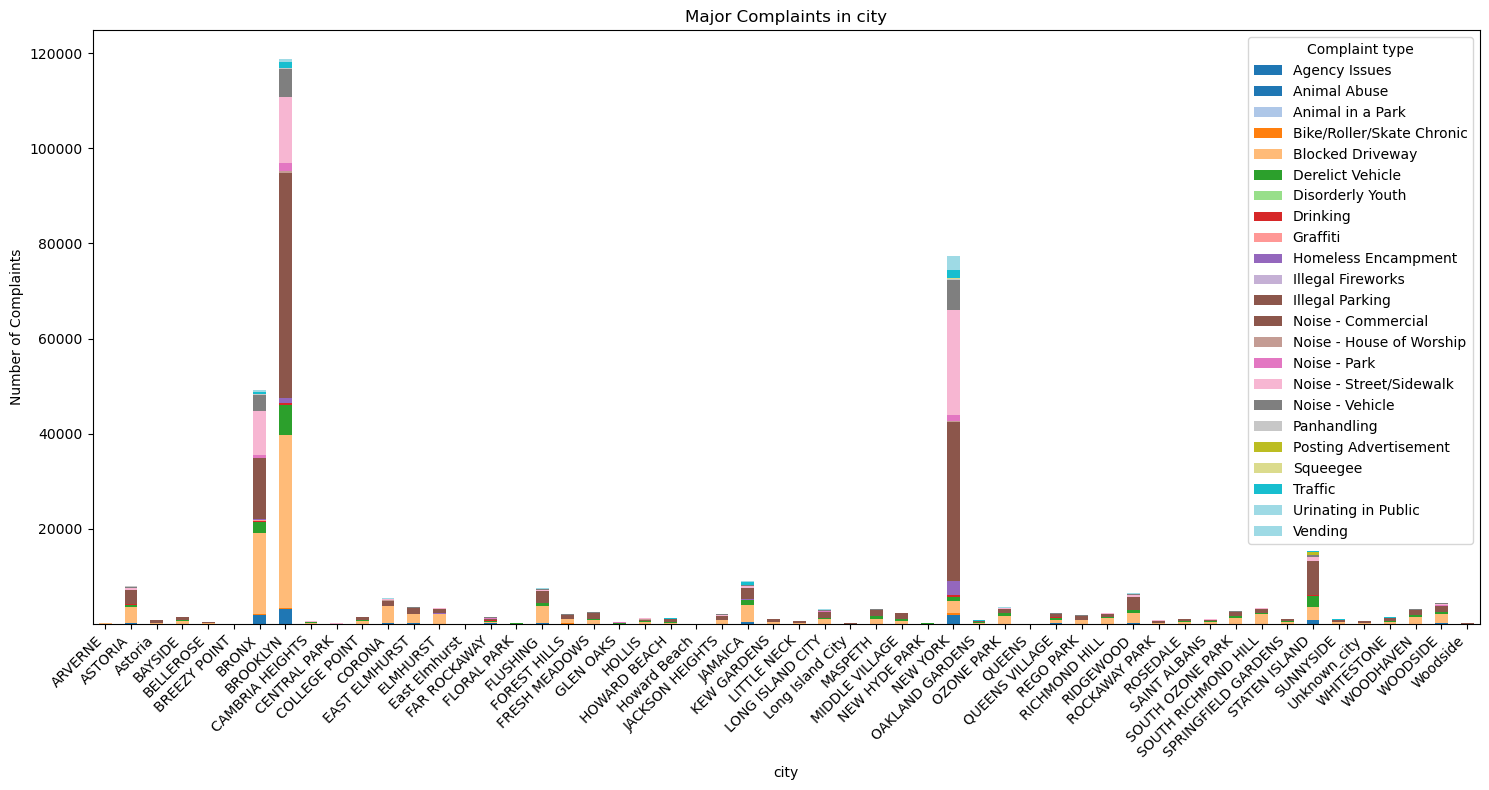

In [156]:
Major_type_City_Complaints = df_311_CSRA.groupby(["City","Complaint Type"]).size().unstack()
plt.figure(figsize=(12,8))
Major_type_City_Complaints.plot(kind='bar',stacked=True,colormap='tab20')
plt.title('Major Complaints in city')
plt.xlabel("city")
plt.ylabel('Number of Complaints')
plt.legend(title='Complaint type', bbox_to_anchor=(1,1))
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

### 4.2 Sort the complaint types based on the average Request_Closing_Time grouping them for different locations

In [157]:
df_311_CSRA['Closed Date']=pd.to_datetime(df_311_CSRA['Closed Date'])
df_311_CSRA['Created Date']=pd.to_datetime(df_311_CSRA['Created Date'])
df_311_CSRA['Closed_Time_In_Seconds'] = (df_311_CSRA['Closed Date']-df_311_CSRA['Created Date'])

In [158]:
Avrge_CloseTime_of_Complaint=df_311_CSRA['Closed_Time_In_Seconds'].mean()

In [159]:
#sorted_avg_tm=Avrge_CloseTime_of_Complaint.sort_values()
print(f"Average_closing_time:{Avrge_CloseTime_of_Complaint}")

Average_closing_time:0 days 04:11:53.299632500


In [160]:
Avrge_CloseTime_of_Complaint_time_location=df_311_CSRA.groupby(['City',"Complaint Type"])['Created Date'].mean()

In [161]:
sorted_data=Avrge_CloseTime_of_Complaint_time_location.sort_values()
print(f'complaint types based on the average Request_Closing_Time:')
print(sorted_data)

complaint types based on the average Request_Closing_Time:
City                 Complaint Type          
ELMHURST             Graffiti                   2015-01-05 11:57:09.000
SOUTH RICHMOND HILL  Urinating in Public        2015-01-12 15:06:00.000
Unknown_city         Panhandling                2015-01-13 21:26:35.000
COLLEGE POINT        Noise - House of Worship   2015-01-14 12:52:40.500
WOODHAVEN            Panhandling                2015-01-14 16:01:38.000
                                                          ...          
ARVERNE              Noise - Commercial         2015-12-04 21:41:10.500
BREEZY POINT         Noise - Street/Sidewalk    2015-12-11 13:58:46.000
FLORAL PARK          Drinking                   2015-12-11 14:59:34.000
FLUSHING             Posting Advertisement      2015-12-11 17:16:54.000
QUEENS VILLAGE       Panhandling                2015-12-20 14:23:13.000
Name: Created Date, Length: 792, dtype: datetime64[ns]


### 5. See whether the average response time across different complaint types is similar (overall)

In [162]:
print(Avrge_CloseTime_of_Complaint_time_location)

City      Complaint Type         
ARVERNE   Animal Abuse              2015-07-17 12:46:09.456521728
          Blocked Driveway          2015-06-24 07:58:35.280000000
          Derelict Vehicle          2015-07-13 12:29:50.781250048
          Disorderly Youth          2015-07-20 20:09:29.000000000
          Drinking                  2015-04-26 20:15:41.000000000
                                                 ...             
Woodside  Blocked Driveway          2015-04-22 09:57:17.074073856
          Derelict Vehicle          2015-03-19 18:46:05.500000000
          Illegal Parking           2015-05-22 18:04:55.532258048
          Noise - Commercial        2015-04-19 02:08:56.500000000
          Noise - Street/Sidewalk   2015-05-10 20:15:32.400000000
Name: Created Date, Length: 792, dtype: datetime64[ns]


### 5.1 Visualize the average of Request_Closing_Time

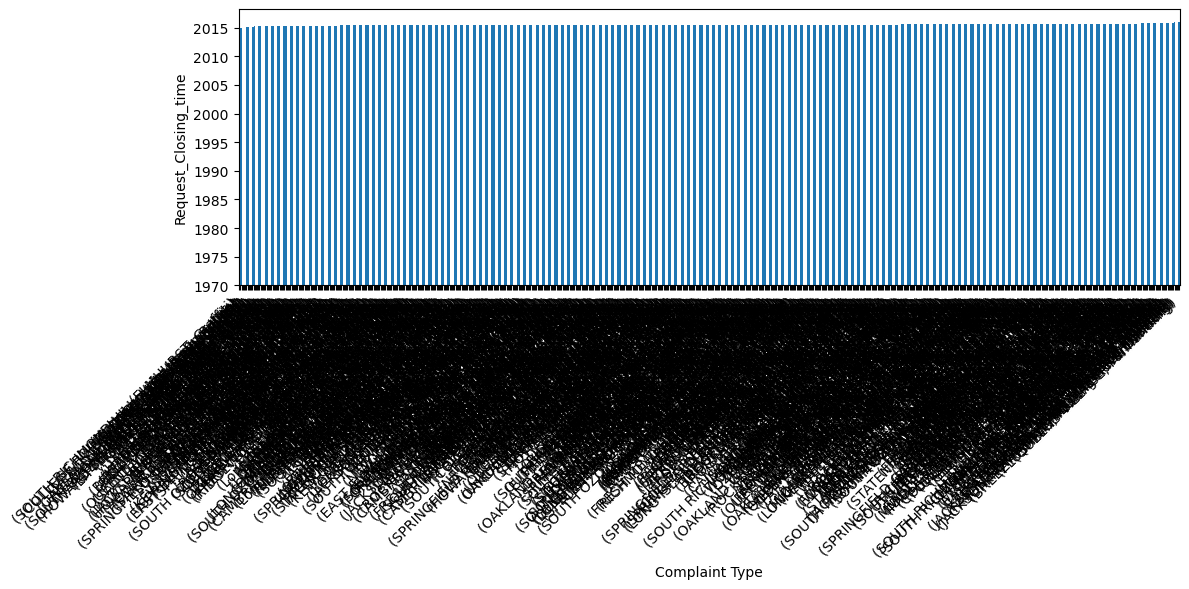

In [163]:
plt.figure(figsize=(12,6))
sorted_data.plot(kind='bar')
plt.xlabel('Complaint Type')
plt.ylabel('Request_Closing_time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### significant variables by performing statistical analysis using p-values

In [173]:
#creating the contengency table
contingency_table = pd.crosstab(df_311_CSRA["Complaint Type"],df_311_CSRA["City"] )

#chi_square test

ch2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f'chi-squared statistic:{ch2_stat}')
print(f'P-Value:{p_val}')

chi-squared statistic:145971.80461890675
P-Value:0.0


### Perform a Kruskal-Wallis H test

In [192]:
#City_unique=df_311_CSRA["City"]
#data_groups = df_311_CSRA.groupby(['City',"Complaint Type"])['Created Date'] 
boroughs = df_311_CSRA['Borough'].unique()
data_groups = [df_311_CSRA[df_311_CSRA['Borough'] == Borough]['Created Date'] for Borough in boroughs]

#performing kruskal wallis test

h_stat, p_val = kruskal(*data_groups)

# Set significance level
alpha = 0.05

# Interpret the result
if p_val >= alpha:
    print("Fail to Reject H0: All sample distributions are equal.")
else:
    print("Reject H0: One or more sample distributions are not equal.")

Reject H0: One or more sample distributions are not equal.
